In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()
sns.set_style("whitegrid")

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

In [5]:
mldata = pd.read_csv("mldata.csv")

In [6]:
# Preprocessing of Random Forest Reg with "post_click_sales_amount" as Target

# all Campaigns
mldata_camp_total = mldata

# Only Camp 1
mldata_camp_1 = mldata[mldata["campaign_number"] == "camp 1"]

# Only Camp 2
mldata_camp_2 = mldata[mldata["campaign_number"] == "camp 2"]

# Only Camp 3
mldata_camp_3 = mldata[mldata["campaign_number"] == "camp 3"]


# Selection of selected features relevant for ML - without "campaign_number" as feature - with "post_click_sales_amount" as label:

# all Campaigns
mldata_camp_total = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 1
mldata_camp_1 = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 2
mldata_camp_2 = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 3
mldata_camp_3 = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

mldata_camp_3.head()

,banner,placement,ad_spend_by_company_x,post_click_sales_amount
0,160 x 600,def,0.2096,0.0000
1,160 x 600,ghi,0.0000,0.0000
2,160 x 600,mno,2.6210,532.0745
3,160 x 600,abc,0.0000,0.0000
4,160 x 600,def,1.1008,0.0000


C:\Users\Oliver\AppData\Local\Temp\ipykernel_39772\3014478030.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)




The model performance for test set
--------------------------------------
MAE: 965.6191955988786
MSE: 19238581.256113973
RMSE: 4386.180714028319
R2 score is 0.8214867327218145


The model performance for training set
--------------------------------------
R2 score is 0.9750337280692242




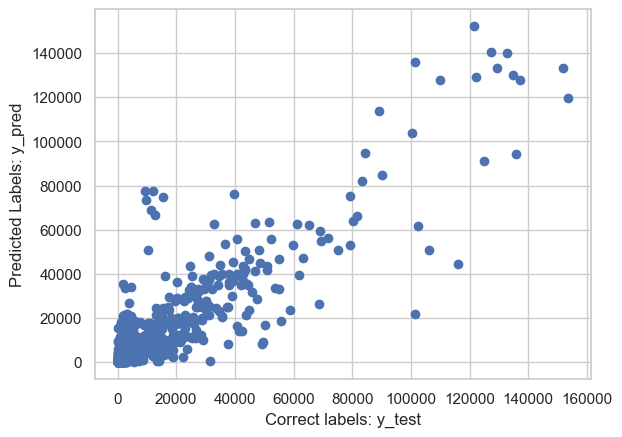

In [18]:
### RandomForest Regression - all Campaigns  ###

# Define the features(X) and the label(y)
X = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_total[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for RandomForest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model:
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, rf.predict(X_train))))
print("\n")

C:\Users\Oliver\AppData\Local\Temp\ipykernel_39772\1249891763.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)




The model performance for test set
--------------------------------------
MAE: 1110.676317334611
MSE: 13590490.898974745
RMSE: 3686.528298952111
R2 score is 0.9415851263491933


The model performance for training set
--------------------------------------
R2 score is 0.991424387785714




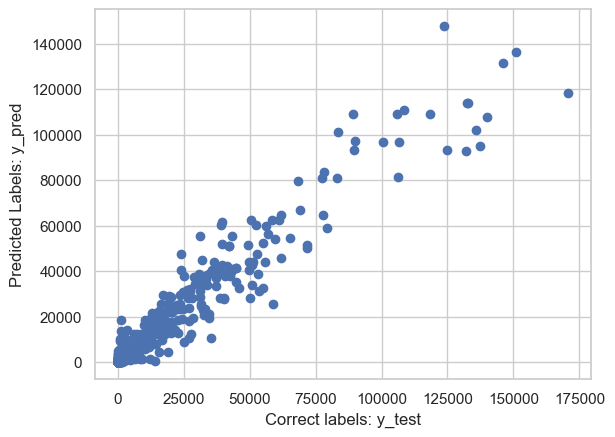

In [19]:
### RandomForest Regression - Campaign 1  ###

# Define the features(X) and the label(y)
X = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_1[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for RandomForest Regression
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model:
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, rf.predict(X_train))))
print("\n")

C:\Users\Oliver\AppData\Local\Temp\ipykernel_39772\387186343.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)




The model performance for test set
--------------------------------------
MAE: 407.50837162940365
MSE: 2344598.0649908804
RMSE: 1531.2080410548008
R2 score is 0.48795313375128535


The model performance for training set
--------------------------------------
R2 score is 0.9136812658475557




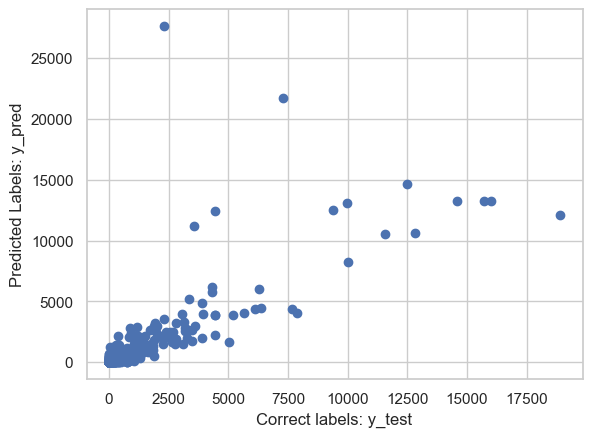

In [20]:
### RandomForest Regression - Campaign 2  ###

# Define the features(X) and the label(y)
X = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_2[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for RandomForest Regression
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model:
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, rf.predict(X_train))))
print("\n")



C:\Users\Oliver\AppData\Local\Temp\ipykernel_39772\4130207401.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)




The model performance for test set
--------------------------------------
MAE: 133.75436584067313
MSE: 1747983.5056819129
RMSE: 1322.1132726366197
R2 score is 0.01120319407560677


The model performance for training set
--------------------------------------
R2 score is 0.8378174327527294




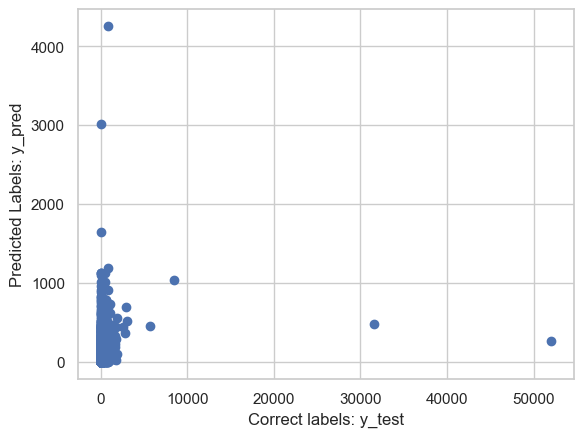

In [22]:
### RandomForest Regression - Campaign 3  ###

# Define the features(X) and the label(y)
X = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_3[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for RandomForest Regression
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model:
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, rf.predict(X_train))))
print("\n")